### PCA Visualizations

In [3]:
import numpy as np
from PIL import Image

import os
from glob import iglob
from sklearn.decomposition import PCA

In [102]:
# test_images = [os.path.join("../data/KL01_GAN/all/img/", x) for x in os.listdir("../data/KL01_GAN/all/img/")]
# fake_images = list(iglob("JAMIA_GAN_KL01_Synthetic_100shot/eval_11000/img/**"))


test_images = list(iglob("/data_vault/hexai/KL01_KL234_Real/KL234/**"))
fake_images = list(iglob("/data_vault/hexai/SyntheticKneeImages/KL234/**"))

In [103]:
fake_images

['/data_vault/hexai/SyntheticKneeImages/KL234/KL234_14877.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_23003.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_08286.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_18095.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_21614.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_00802.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_09198.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_21172.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_09826.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_16906.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_02973.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_23765.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_02967.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_23771.png',
 '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_21166.png',
 '/data_vault/hexai/SyntheticKneeImages/

In [104]:
len(test_images)

3194

In [105]:
np.random.seed(42)
fake_sample = np.random.choice(fake_images, len(test_images))

In [106]:
fake_sample

array(['/data_vault/hexai/SyntheticKneeImages/KL234/KL234_22516.png',
       '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_02664.png',
       '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_04287.png', ...,
       '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_05133.png',
       '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_02413.png',
       '/data_vault/hexai/SyntheticKneeImages/KL234/KL234_20269.png'],
      dtype='<U59')

In [107]:
labels = ["REAL"] * len(test_images) + ["FAKE"] * len(fake_sample)

In [108]:
flattened_test = []
flattened_fake = []
for i in range(len(test_images)):
    real = Image.open(test_images[i]).convert("L")
    fake = Image.open(fake_sample[i]).convert("L")
    if real.size != (224, 224):
        real = real.resize((224, 224))
    if fake.size != (224, 224):
        fake = fake.resize((224, 224))
    real = np.array(real).flatten()
    fake = np.array(fake).flatten()
    flattened_test.append(real)
    flattened_fake.append(fake)

In [109]:
len(flattened_test), len(flattened_fake)

(3194, 3194)

In [110]:
flattened_test[3].shape

(50176,)

In [111]:
flattened_test, flattened_fake = np.array(flattened_test), np.array(flattened_fake)
flattened_test, flattend_fake = flattened_test - np.average(flattened_test, axis=0), flattened_fake - np.average(flattened_fake, axis=0)

In [112]:
pca = PCA()

In [113]:
pca.fit_transform(flattened_test)

array([[-1.79161602e+03, -7.38612189e+02, -2.21985445e+03, ...,
         1.91883576e-01, -9.45377417e-02,  2.87272725e-12],
       [ 3.58509299e+03, -4.90101848e+03, -1.42631099e+03, ...,
        -1.34686124e-01, -1.01342598e-01,  2.87272725e-12],
       [ 9.33622583e+02,  1.13270537e+03,  1.85616614e+03, ...,
         6.20474941e-02, -3.23060415e-01,  2.87272725e-12],
       ...,
       [ 5.52125122e+01, -3.53478219e+01,  5.96995963e+02, ...,
         3.19219676e-01,  2.64460816e-01,  2.87272725e-12],
       [ 1.06531776e+03, -7.98303119e+02, -1.27908018e+03, ...,
        -6.90157374e-02, -1.29589902e-02,  2.87272725e-12],
       [ 1.59931275e+03, -3.16740581e+03,  1.82345409e+03, ...,
         3.28661897e-01,  1.05730276e-01,  2.87272725e-12]])

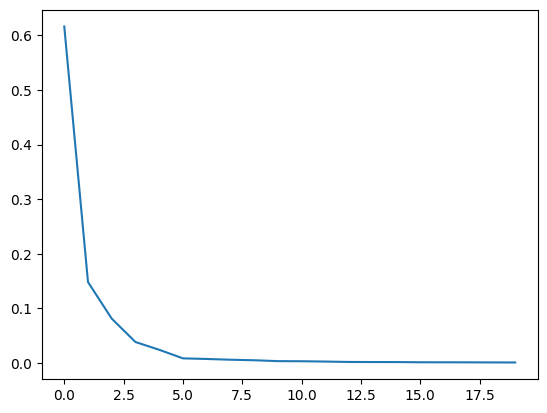

In [114]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_[:20])

In [115]:
np.sum(pca.explained_variance_ratio_[:10])

0.939035601114227

In [116]:
!pip install plotly

In [117]:
import plotly.express as px
real_labels =  ["REAL"] * len(test_images) 

fig = px.scatter(pca.components_, x=1, y=2, color=real_labels)
fig.show()

In [118]:
pca_fake = PCA()
pca_fake.fit_transform(flattened_fake)

array([[-8.78219641e+02,  3.78844649e+03,  4.39213383e+03, ...,
         3.58430625e-18,  1.75915202e-18,  1.76524159e-19],
       [ 4.23445374e+03,  7.97518568e+02,  3.16563540e+02, ...,
        -1.40995697e-15,  9.83048418e-16,  5.99392003e-16],
       [-4.30829087e+03,  2.52940102e+03, -1.80557529e+03, ...,
         3.58430625e-18,  1.75915202e-18,  1.76524159e-19],
       ...,
       [ 3.46027901e+03,  3.47579841e+03, -2.12068934e+03, ...,
         3.58430625e-18,  1.75915202e-18,  1.76524159e-19],
       [-1.28773434e+03, -5.57129310e+02,  2.40640502e+03, ...,
         3.58430625e-18,  1.75915202e-18,  1.76524159e-19],
       [-7.02293081e+03, -3.11729332e+03, -1.33891288e+03, ...,
         3.58430625e-18,  1.75915202e-18,  1.76524159e-19]])

In [119]:
import plotly.express as px
labels =  ["FAKE"] * len(test_images) 
fig = px.scatter(pca_fake.components_, x=1, y=2, color=labels)
fig.show()

In [120]:
pca.components_.shape


(3194, 50176)

In [121]:
stacked = np.vstack((pca.components_, pca_fake.components_))

In [122]:
from scipy.stats import shapiro
shapiro(pca.components_[:,2])

ShapiroResult(statistic=0.9965153456830192, pvalue=9.36739742565773e-07)

In [123]:
shapiro(pca_fake.components_[:, 2])

ShapiroResult(statistic=0.14322989681960607, pvalue=8.184392872681428e-81)

In [124]:
stacked.shape

(6388, 50176)

In [125]:
len(real)

50176

In [126]:
ds_labels = ["Real"]*len(real_labels) + ["Fake"]*len(real_labels)

In [127]:
len(ds_labels)

6388

In [128]:
import plotly.graph_objects as go

In [129]:
pca_stacked = PCA()
pca_stacked.fit_transform(stacked)

array([[ 7.93886248e-01,  4.46564023e-01,  2.39533354e-01, ...,
        -7.62747092e-05, -2.95471781e-03,  1.51743862e-17],
       [ 4.85885554e-01, -8.19072213e-01, -1.99078334e-01, ...,
        -5.75116962e-04, -2.90053815e-04,  1.51743862e-17],
       [-1.82250716e-01, -3.14023102e-01,  8.05557704e-01, ...,
         5.23314216e-03, -7.80437070e-05,  1.51743862e-17],
       ...,
       [ 4.20610522e-05, -1.72730597e-04,  4.67353113e-05, ...,
        -3.25473946e-07, -1.49174454e-07,  1.51743862e-17],
       [-1.57293668e-04, -7.57132723e-05, -7.09744325e-05, ...,
        -2.26556307e-08, -3.51025383e-07,  1.51743862e-17],
       [-5.31237437e-06, -1.98155885e-04, -5.72194359e-05, ...,
        -9.47038132e-08, -2.25890130e-08,  1.51743862e-17]])

In [130]:
import plotly.express as px
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter(pca_stacked.components_, x=0, y=1
                 , color=ds_labels)
fig.show()

In [82]:
fig = px.scatter_matrix(
    pca_stacked.components_,
    labels=labels,
    dimensions=range(4),
    color=ds_labels
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [83]:
import glob
kl = list(glob.iglob("../data/TkaFewShotCompleteDataset/results/**"))

In [84]:
len(kl) + 3730

3730

In [37]:
from scipy import stats

pc1_tstat, pc1_pval = stats.ttest_ind(pca.components_[:, 1], pca_fake.components_[:, 1])

In [38]:
pc1_tstat, pc1_pval

(0.5304955645135406, 0.5957868295859791)

In [39]:
from scipy import stats

# Example FID scores for different K-shots
fid_25 = [43.595, 60.920, 31.746]
fid_50 = [34.234, 32.333, 23.615]
fid_100 = [30.083, 22.577, 22.538]

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(fid_25, fid_50)
print("Paired t-test p-value (25 vs 50):", p_value)

# For multiple groups, use ANOVA
f_stat, p_value_anova = stats.f_oneway(fid_25, fid_50, fid_100)
print("ANOVA p-value:", p_value_anova)


Paired t-test p-value (25 vs 50): 0.1462274557726452
ANOVA p-value: 0.08571168087841802


In [85]:
import pandas as pd
component_names = [f"PC{i+1}" for i in range(pca_stacked.components_.shape[1])]
X_pca = pd.DataFrame(pca_stacked.components_, columns=component_names)
# Create loadings
# # loadings = pd.DataFrame(
#     pca.components_.T,  # transpose the matrix of loadings
#     columns=component_names,  # so the columns are the principal components


In [41]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    row = 0
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(row)
        row += 1
    return out

outliers = set(Zscore_outlier(X_pca["PC1"]) + Zscore_outlier(X_pca["PC2"]))

In [42]:
outliers

{2382,
 2425,
 2476,
 2499,
 2608,
 2634,
 2640,
 2651,
 2677,
 2712,
 2716,
 2743,
 2767,
 2775,
 2781,
 2787,
 2790,
 2797,
 2800,
 2807,
 2814,
 2833,
 2834,
 2842,
 2856,
 2859,
 2862,
 2866,
 2874,
 2877,
 2882,
 2884,
 2890,
 2893,
 2912,
 2914,
 2918,
 2920,
 2921,
 2933,
 2941,
 2944,
 2946,
 2947,
 2949,
 2953,
 2956,
 2958,
 2959,
 2969,
 2970,
 2972,
 2975,
 2978,
 2980,
 2982,
 2988,
 2990,
 2998,
 3000,
 3009,
 3010,
 3014,
 3019,
 3020,
 3022,
 3023,
 3028,
 3033,
 3037,
 3038,
 3040,
 3041,
 3043,
 3046,
 3053,
 3058,
 3062,
 3067,
 3068,
 3070,
 3076,
 3083,
 3087,
 3088,
 3091,
 3092,
 3096,
 3103,
 3107,
 3108,
 3111,
 3114,
 3119,
 3120,
 3124,
 3127,
 3128,
 3129,
 3130,
 3131,
 3132,
 3136,
 3141,
 3142,
 3145,
 3146,
 3147,
 3149,
 3151,
 3153,
 3156,
 3157,
 3159,
 3162,
 3164,
 3165,
 3166,
 3168,
 3170,
 3172,
 3173,
 3175,
 3179,
 3181,
 3182,
 3184,
 3186,
 3187,
 3188,
 3189,
 3192,
 3197,
 3200,
 3201,
 3202,
 3205,
 3206,
 3207,
 3212,
 3213,
 3214,
 3215,

In [98]:
idx = np.array(X_pca[(X_pca.PC1 > 0.008) & (X_pca.PC2 > 0)].index)

In [99]:
total_images  = np.concatenate([test_images, fake_sample])

In [100]:
len(total_images[idx])

832

In [101]:
real_images_keep = [img for img in total_images[idx] if "KL01_KL234_Real" in img]
fake_images_keep = [img for img in total_images[idx] if "Synthetic" in img]
with open("KL01_Real.txt", "w") as f:
    for file in real_images_keep:
        f.write(file + "\n")

with open("KL01_Fake.txt", "w") as f:
    for file in fake_images_keep:
        f.write(file + "\n")

In [132]:
from sklearn.cluster import DBSCAN

In [186]:
dbscan = DBSCAN(min_samples=3)

In [187]:
dbscan.fit(pca_stacked.components_[0:2].reshape(-1,1))

DBSCAN(min_samples=3)

In [188]:
np.unique(dbscan.labels_)

array([0])

In [173]:
np.sum(dbscan.labels_ == -1)

0

In [170]:
pca_stacked.components_[0:2]

array([[-0.00040275, -0.0005392 , -0.00066125, ..., -0.00039463,
        -0.00036096, -0.00020205],
       [-0.00424692, -0.00469159, -0.00467951, ..., -0.01418146,
        -0.01410068, -0.01408627]])